# Рынок заведений общественного питания Москвы

 Исследование рынка общественного питания Москвы для партнеров, с целью выяснить текущее положение дел - сможем ли мы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?
 
 Продукт: кафе в Москве, где гостей обслуживают роботы.
 
 Цель: показать инвесторам, что продукт стоит того, чтобы в него инвестировать

# Описание данных

**Таблица /datasets/rest_data.csv:**
- id — идентификатор объекта;
- object_name — название объекта общественного питания;
- chain — сетевой ресторан;
- object_type — тип объекта общественного питания;
- address — адрес;
- number — количество посадочных мест.


## План работы: 

Шаг 1. [Изучение и подготовка данных](#step1)  

Шаг 2. [Анализ данных](#step2)

Шаг 3. [Презентация](#step3)

In [1]:
#импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from matplotlib import pyplot

###  Шаг 1. Изучение и подготовка данных: <a id="step1"></a>  

In [2]:
data = pd.read_csv('/datasets/rest_data.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [3]:
data.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


С типами данных все хорошо, пропущенных значений нет, проверим, есть ли дубликаты:

In [4]:
print('Количество дубликатов:', sum(data.duplicated()))

Количество дубликатов: 0


In [5]:
#проверим, есть ли частные дубликаты, например одно и то же кафе по одному и тому же адресу. 
print('Количество дубликатов:', sum(data[['object_name', 'address']].duplicated()))

Количество дубликатов: 207


Дубликаты есть. Но это всего 1% от всех данных, так что можно их просто удалить:

In [6]:
data = data.drop_duplicates(['object_name', 'address'] )

###  Шаг 2. Анализ данных: <a id="step2"></a>  

Изучим соотношение видов объектов общественного питания по количеству:


[Text(0, 0.5, 'Количество'), Text(0.5, 0, 'Вид')]

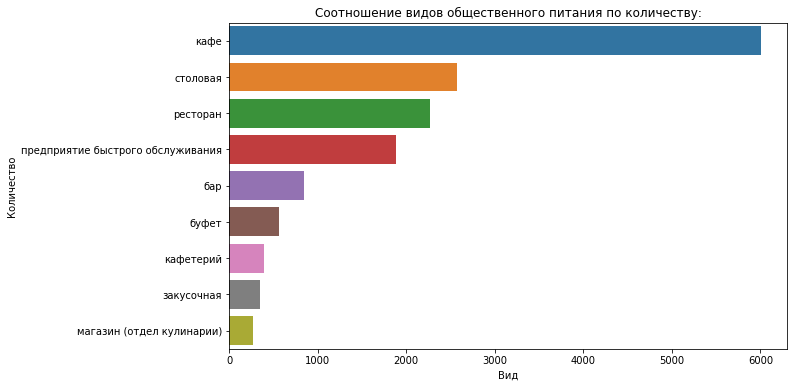

In [7]:
types_count = pd.DataFrame(data.groupby('object_type')['id'].count()).reset_index().sort_values('id', ascending = False)

fig, ax = pyplot.subplots(figsize=(10, 6))

sns.barplot(x='id', y='object_type', data=types_count)
ax.set_title('Соотношение видов общественного питания по количеству:')
ax.set(xlabel='Вид', ylabel='Количество')
#plt.xticks(rotation=15);

Больше всего в Москве Кафе и столовых(неожиданно), на третьем месте рестораны. Меньше всего закусочных и кулинарных отделов в магазинах. 

Изучим соотношение сетевых и несетевых заведений по количеству:

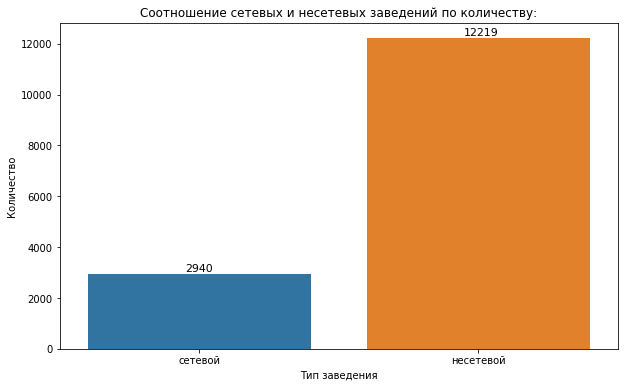

In [8]:
chains_count = pd.DataFrame(data.groupby('chain')['id'].count()).reset_index()
chains_count = chains_count.replace({'да':'сетевой','нет':'несетевой' })

fig, ax = pyplot.subplots(figsize=(10, 6))

ax = sns.barplot(x='chain', y='id', data=chains_count, )

ax.set_title('Соотношение сетевых и несетевых заведений по количеству:')
ax.set(xlabel='Тип заведения', ylabel='Количество')
for i in ax.patches:
    ax.text(i.get_x()+.35, i.get_height()+120, \
            str(round((i.get_height()))), fontsize=11)

Несетевых заведений в Москве больше примерно в 4 раза

Изучим, для какого вида объекта общественного питания характерно сетевое распространение:

[Text(0, 0.5, 'Тип заведения'), Text(0.5, 0, 'Доля сетей')]

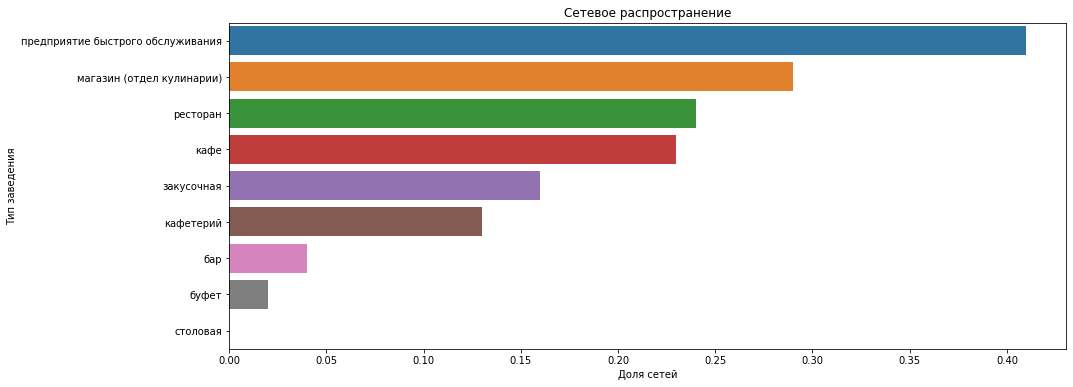

In [9]:
chains_size1 = data[data['chain']=='да'].groupby('object_type').agg({'id':'count'})
chains_size2 = data.groupby('object_type').agg({'chain':'count'})
chain_size = chains_size1.merge(chains_size2, on = 'object_type')
chain_size['share'] = round(chain_size['id']/chain_size['chain'], 2)
chain_size = chain_size.sort_values('share', ascending = False)

fig, ax = pyplot.subplots(figsize=(15, 6))

sns.barplot(x='share', y=chain_size.index, data=chain_size, )
ax.set_title('Сетевое распространение')
ax.set(xlabel='Доля сетей', ylabel='Тип заведения')

Исходя из полученных данных можно утверждать, что больше всего сетевых заведений среди предприятий быстрого обслуживани. Меньше всего среди столовых. Выглядит правдоподобно.

Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

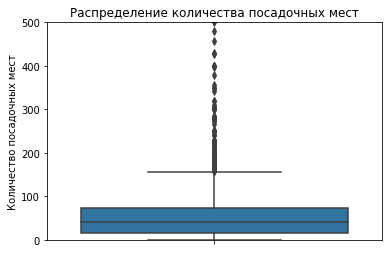

In [10]:
#построим boxplot, чтобы посмотреть на распределение данных и отсечь выбросы:

sns.boxplot(y="number", data=data[data['chain']=='да'])
plt.ylim(0, 500)

plt.title('Распределение количества посадочных мест')
plt.ylabel('Количество посадочных мест');

In [11]:
data[data['chain']=='да']['number'].describe()

count    2940.000000
mean       53.061565
std        57.239716
min         0.000000
25%        15.000000
50%        40.000000
75%        72.000000
max       580.000000
Name: number, dtype: float64

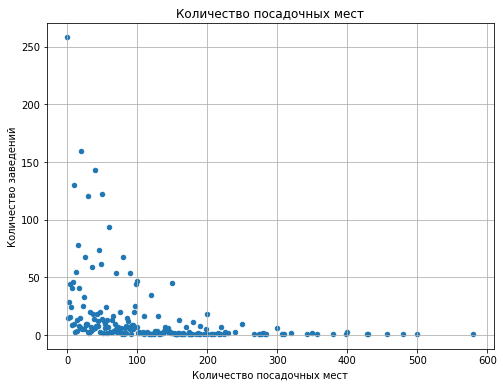

In [12]:
#ответим на вопрос про количество посадочных мест
seats_count = pd.DataFrame(data[data['chain']=='да'].groupby('number')['id'].count()).reset_index()

seats_count.plot(x='number', 
      y='id', 
      kind='scatter', figsize=(8, 6), grid=True) 
plt.xlabel('Количество посадочных мест')
plt.ylabel('Количество заведений')
plt.title('Количество посадочных мест');

#plt.ylim(0, 500);

Из данных видно, что 75% всех ресторанов имеют до 70 посадочных мест, остальные 25% - это рестораны с большим количеством посадочных мест. Поэтому можно утверждать, что на рынке очень много сетевых заведений с небольшим числом посадочных мест, но и больших заведений тоже достаточно.

Изучим, среднее количество посадочных мест для каждого вида объекта общественного питания. Какой вид предоставляет в среднем самое большое количество посадочных мест?

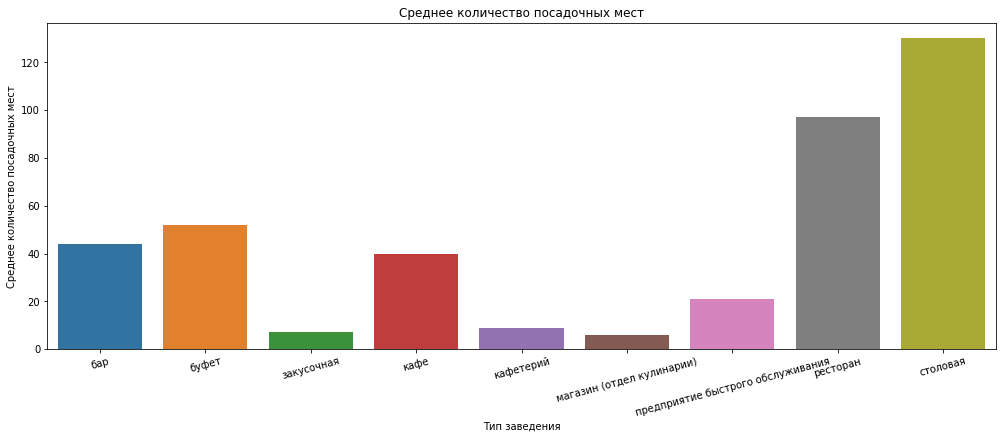

In [13]:
mean_seats = data.pivot_table(index = 'object_type', values = 'number', aggfunc = 'mean')
mean_seats['number'] = mean_seats['number'].round()

fig, ax = pyplot.subplots(figsize=(17, 6))
sns.barplot(x=mean_seats.index, y='number', data=mean_seats, )
ax.set_title('Среднее количество посадочных мест')
ax.set(xlabel='Тип заведения', ylabel='Среднее количество посадочных мест')
plt.xticks(rotation=15);


Самое большое количество посадочных мест в ресторанах и столовых. Меньше всего в отделах кулинарии. 



Для дальнейшей работы выделим в отдельный столбец информацию об улице из столбца address. Отдельно выделим улицы в районах за МКАД:

In [14]:
outmkad_data = data[data['address'].str.contains('город Зеленоград|поселение Сосенское|поселение Московский|город Троицк|город Московский|город Щербинка')]
msk_data = data[~data['address'].str.contains('город Зеленоград|поселение Сосенское|поселение Московский|город Троицк|город Московский|город Щербинка')]

msk_data['street'] = msk_data['address'].str.split(', ', expand=True)[1]
outmkad_data['street'] = outmkad_data['address'].str.split(', ', expand=True)[2]

new_data = pd.concat([msk_data, outmkad_data])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Построим график топ-10 улиц по количеству объектов общественного питания. Добавим внешнюю информацию и узнаем, в каких районах Москвы находятся эти улицы. 

In [15]:
#добавим районы Москвы к улицам:
districts = pd.read_csv('mosgaz-streets.csv').drop_duplicates('streetname')

upd_data = new_data.merge(districts[['streetname','area']], 
                      left_on='street', 
                      right_on='streetname', 
                      how = 'left')

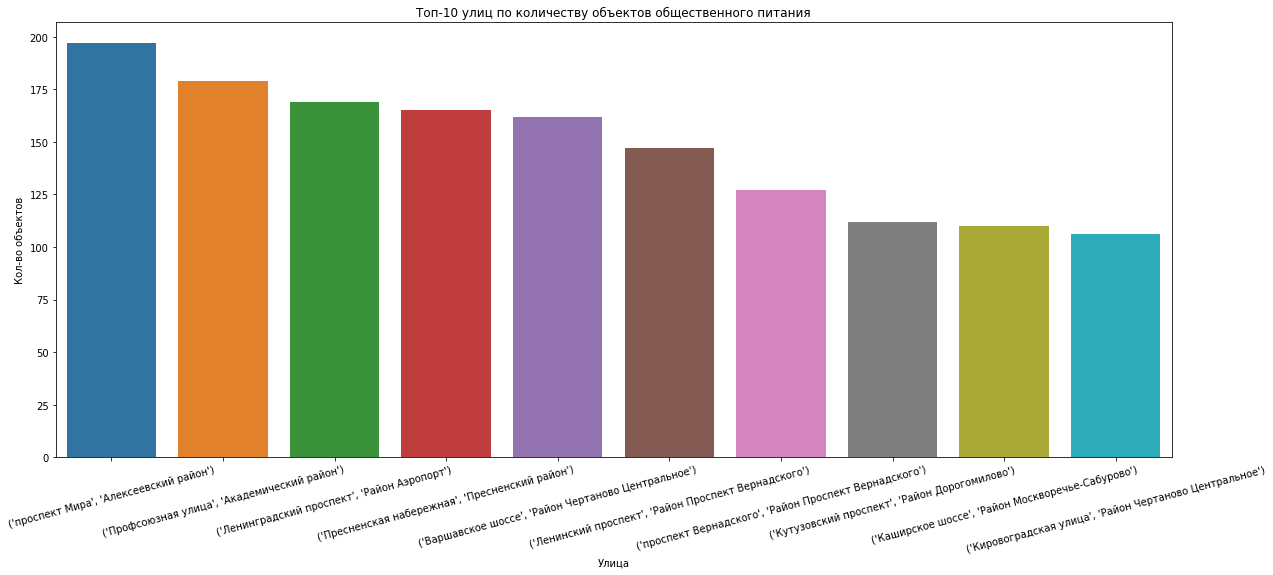

In [16]:
#построим график топ-10 улиц: 
top10_streets = pd.DataFrame(upd_data.groupby(['street', 'area'])['id'].count()).sort_values('id', ascending = False).head(10)

fig, ax = pyplot.subplots(figsize=(20, 8))
sns.barplot(x=top10_streets.index, y='id', data=top10_streets, )
ax.set_title('Топ-10 улиц по количеству объектов общественного питания')
ax.set(xlabel='Улица', ylabel='Кол-во объектов')
plt.xticks(rotation=15);

Больше всего объектов общественного питания на проспекте Мира, Профсоюзной улице и Ленинградском проспекте. Закрывают топ-10 Кутузовский проспект, Каширское шоссе и Кировоградская улица. Топ-5 улиц находятся в западной части Москвы в районах, наиболее близких к ТТК,деловым центрам и паркам. А еще это крупные магистрали города.

Найдем число улиц с одним объектом общественного питания. Определим, в каких районах Мск находятся эти улицы.

In [17]:
min_streets = pd.DataFrame(upd_data.groupby(['street', 'area'])['id'].count()).sort_values('id').reset_index()
min_streets = min_streets[min_streets['id'] == 1]
print('Число улиц с одним объектом общественного питания:', min_streets['street'].count())

Число улиц с одним объектом общественного питания: 521


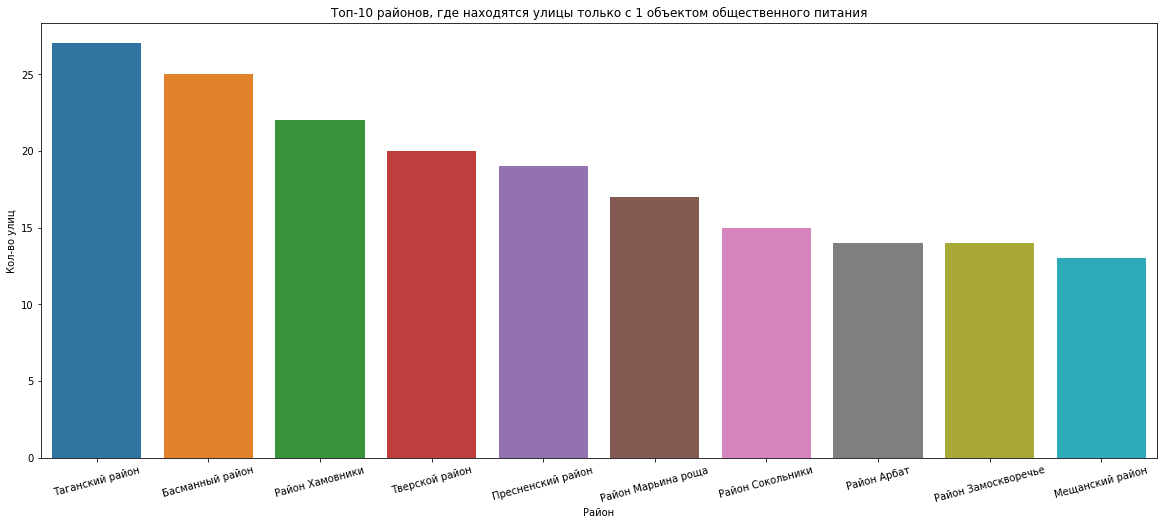

In [18]:
#определим топ-10 районов, где находятся улицы только с 1 объектом общественного питания:
min_districts = pd.DataFrame(min_streets.groupby('area')['street'].count()).sort_values('street', ascending = False).head(10)

fig, ax = pyplot.subplots(figsize=(20, 8))
sns.barplot(x=min_districts.index, y='street', data=min_districts, )
ax.set_title('Топ-10 районов, где находятся улицы только с 1 объектом общественного питания')
ax.set(xlabel='Район', ylabel='Кол-во улиц')
plt.xticks(rotation=15);

Больше всего таких улиц находидтся в Таганском, Басманном районах и Хамовниках. Замыкают топ-10 Замоскворечье, Арбат и Мещанский районы.

Несмотря на то, что это центральные районы, такие улицы находятся:
- либо в глубине района в спальном секторе, 
- либо это маленькие переулочки рядом с большими магистралями, ведущие в глубь района(на расстоянии 1-2 домов), на которых располагается большое количество заведений общественного питания, 
- либо это переулки, которые редко указываются в адресах, потому что адресом является более крупная улица
- либо это улицы далеко от метро.

Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания и выявим закономерности:

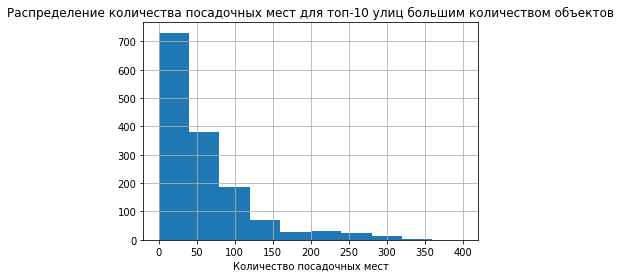

In [19]:
#выделим данные по топ-10 улиц и постоим распределение 
top10_streets_data = upd_data[upd_data['street'].isin(list(top10_streets.reset_index()['street']))]

top10_streets_data['number'].hist(bins = 10, range = (0, 400) )

plt.xlabel('Количество посадочных мест')
plt.title('Распределение количества посадочных мест для топ-10 улиц большим количеством объектов'); 

In [20]:
top10_streets_data['number'].describe()

count    1474.000000
mean       58.500000
std        90.604347
min         0.000000
25%        12.000000
50%        40.000000
75%        75.000000
max      1700.000000
Name: number, dtype: float64

Для улиц с большим количеством объектов питания характерны небольшие помещения со средним количеством мест - 40. В большей части таких заведений меньше 80 мест. 

Скорее всего, это связано с тем, что на популярных улицах дорогая аренда и сложно найти большое помещение. 

###  Шаг 3. Презентация: <a id="step3"></a>  

Презентация: https://drive.google.com/file/d/1IWxYunZxemHVnOfI8I_rCgCapkFb0sp2/view?usp=sharing

# Вывод:


1. В Москве больше всего кафе и столовых, рестораны на 3 месте. Меньше всего закусочных и кулинарных отделов в магазинах. Скорее всего это связано с типом обслуживания и предполагаемым способом провести время: в московском прохладном климате часто комфортнее пойти в кафе или ресторан, чтобы пообщаться с друзьми или отметить какое-то мероприятие. Кулинарные отделы не пользуются популярностью вероятно потому, что часто качество продуктов оставляет желать лучшего.

2. В Москве больше несетевых заведений: вероятно, многие объекты общественного питания предпочитают открываться в единственном экземпляре, так как это дешевле, проще управлять и сохранять качество услуг.

3. Больше всего сетевых заведений среди предприятий быстрого обслуживани. Меньше всего среди столовых. Выглядит правдоподобно.

4. Из данных видно, что 75% всех ресторанов имеют до 70 посадочных мест, остальные 25% - это рестораны с большим количеством посадочных мест. Поэтому можно утверждать, что на рынке очень много сетевых заведений с небольшим числом посадочных мест, но и больших заведений тоже достаточно. Самое большое количество посадочных мест в ресторанах и столовых. Меньше всего в отделах кулинарии. 

5. Больше всего объектов общественного питания на проспекте Мира, Профсоюзной улице и Ленинградском проспекте. Закрывают топ-10 Кутузовский проспект, Каширское шоссе и Кировоградская улица. Топ-5 улиц находятся в западной части Москвы в районах, наиболее близких к ТТК,деловым центрам и паркам. А еще это крупные магистрали города.

6. Больше всего таких улиц находидтся в Таганском, Басманном районах и Хамовниках. Замыкают топ-10 Замоскворечье, Арбат и Мещанский районы. Несмотря на то, что это центральные районы, такие улицы находятся:
    - либо в глубине района в спальном секторе, 
    - либо это маленькие переулочки рядом с большими магистралями, ведущие в глубь района(на расстоянии 1-2 домов), на которых располагается большое количество заведений общественного питания, 
    - либо это переулки, которые редко указываются в адресах, потому что адресом является более крупная улица
    - либо это улицы далеко от метро.

7. Для улиц с большим количеством объектов питания характерны небольшие помещения со средним количеством мест - 40. В большей части таких заведений меньше 80 мест. Скорее всего, это связано с тем, что на популярных улицах дорогая аренда и сложно найти большое помещение. 

## Рекомендации:

- Чтобы оптимизировать затраты лучше открыть одно небольшое кафе с количеством посадочных мест около 40. 
- Если оно будет прибыльным - можно подумать о сети 
- Расположение лучше выбрать на одной из популярных улиц, где много модных заведений - у них хорошая транспортная доступность и аудитория, которая наиболее открыта к новшествам. 
- Скорее всего средний чек в таком кафе будет выше среднего, поэтому лучше выбрать один из ценральных или западных райнов Москвы.   
- Можно провести дополнительный анализ аудитории,которой может понравиться такой формат и выбрать улицы, которые пользуются популярностью у этой аудитории.


